___

<p style="text-align: center;"><img src="https://clarusway.com/wp-content/uploads/2022/07/clarusway-logo-classic.jpg" class="img-fluid" alt="CLRSWY" width="400" height="300"
></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### <a href="#part_1"> 1. Import Modules, Load Data and Data Review </a>
#### <a href="#part_2">2. Data Pre-Processing</a>
#### <a href="#part_3">3. Implement Linear Regression</a>
#### <a href="#part_4">4. Implement Ridge Regression</a>
#### <a href="#part_5">5. Implement Lasso Regression</a>
#### <a href="#part_6">6. Implement Elastic-Net</a>
#### <a href="#part_7">7. Visually Compare Models Performance In a Graph</a>

<a id="part_1"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 1. Import Modules, Load Data and Data Review </p>


In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import get_scorer_names
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, cross_val_score

import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [214]:
import sklearn
sklearn.__version__

'1.5.0'

In [215]:
df= pd.read_csv('Ready_to_ML.csv')

In [216]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26706,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,Alloy wheels,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
26707,Volvo S40,Volvo,"Stobbeweg 6, 2461 EX TER AAR, NL",5499.000,Sedan,Used,No,145000.000,Automatic,Benzine,Dealer,2435.000,5.000,217.000,Front,"Alloy wheels (16""), Trailer hitch",1357.000,Yes,Cloth,3.000,efficient,18.000,125.000,9.100,Standard,Standard,Safety Standard Package
26708,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,6.000,99.000,Front,"Alloy wheels, Automatically dimming interior m...",1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package
26709,Volvo S90,Volvo,"Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL",29900.000,Sedan,Used,Yes,94343.000,Automatic,Benzine,Dealer,1969.000,8.000,149.000,4WD,"Alloy wheels (18""), Automatically dimming inte...",1617.000,Yes,Part/Full Leather,1.000,efficient,5.000,187.000,6.500,Standard,Standard,Safety Premium Package


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [217]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000
mean,23537.241,68863.812,1708.965,5.820,129.526,1425.205,1.460,5.166,118.414,5.532
std,20811.986,62794.146,772.440,1.417,54.255,307.387,0.853,4.655,65.642,2.220
min,490.000,0.000,0.000,1.000,0.000,347.000,1.000,0.000,33.000,0.000
25%,12490.000,19155.000,1248.000,5.000,105.000,1228.000,1.000,2.000,80.000,4.300
50%,18440.000,54000.000,1595.000,6.000,123.000,1375.000,1.000,4.000,100.000,5.200
75%,28330.000,100675.000,1969.000,6.000,150.000,1597.000,2.000,7.000,135.000,6.400
max,549000.000,667128.000,6300.000,8.000,399.000,3150.000,9.000,20.000,450.000,18.300


In [218]:
df.duplicated().sum()

1815

In [219]:
df.drop_duplicates(inplace=True)

In [220]:
df.duplicated().sum()

0

## Drop make_models with less than 100 counts

In [221]:
make_model_count = df.make_model.value_counts()
make_model_count

make_model
Renault Megane            825
SEAT Leon                 757
Dacia Sandero             721
Hyundai i30               699
Opel Astra                634
                         ... 
Mercedes-Benz S 65 AMG      1
Mercedes-Benz CLK 320       1
Toyota GR86                 1
Toyota Tacoma               1
Renault R 11                1
Name: count, Length: 490, dtype: int64

In [222]:
drop_model = make_model_count[make_model_count<=100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [223]:
for i in drop_model:
    drop_index = df[df['make_model']==i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)    

In [ ]:
df

In [14]:
df.make_model.value_counts()

make_model
Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala      

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [224]:

df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feature.

In [225]:
df.head() # check extras feature turned into numeric

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package


In [226]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [227]:
df_object = df.select_dtypes(include ="object").head()
df_object

# # select_dtypes(include ="object") method to filter only object type features 

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [228]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


In [229]:
for col in df_object:
    print(f"{col:<30}:", df[col].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

## multicollinearity control

In [230]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,24400.000,27150.000,1461.000,6.000,120.000,5,1330.000,2.000,2.000,85.000,4.500
1,7450.000,157500.000,1991.000,6.000,138.000,6,1295.000,2.000,12.000,80.000,5.200
2,29800.000,21734.000,1461.000,7.000,99.500,1,1445.000,2.000,2.000,85.000,3.900
3,21000.000,172700.000,1461.000,7.000,99.500,1,1425.000,3.000,4.000,80.000,3.700
4,26800.000,18989.000,1461.000,7.000,99.500,1,1455.000,2.000,2.000,85.000,3.900
...,...,...,...,...,...,...,...,...,...,...,...
18192,13000.000,114000.000,1969.000,6.000,94.000,9,1532.000,1.000,4.000,88.000,3.600
18193,4999.000,166512.000,2521.000,5.000,145.000,1,1550.000,3.000,18.000,154.000,9.100
18194,37600.000,40345.000,1969.000,8.000,127.000,1,2077.000,2.000,3.000,288.000,2.000
18195,7300.000,96000.000,1560.000,6.000,99.000,3,1356.000,1.000,11.000,84.000,3.800


In [231]:
df_numeric.corr().iloc[1:,1:]

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
mileage,1.000,0.097,-0.075,0.143,-0.176,0.012,0.360,0.743,-0.096,0.111
engine_size,0.097,1.000,0.105,0.623,0.150,0.570,0.062,0.180,0.805,0.627
gears,-0.075,0.105,1.000,0.106,0.189,0.375,-0.070,-0.127,0.275,0.083
co_emissions,0.143,0.623,0.106,1.000,0.067,0.306,0.117,0.331,0.515,0.805
extras,-0.176,0.150,0.189,0.067,1.000,0.323,-0.093,-0.181,0.283,0.087
empty_weight,0.012,0.570,0.375,0.306,0.323,1.000,-0.038,-0.037,0.677,0.266
previous_owner,0.360,0.062,-0.070,0.117,-0.093,-0.038,1.000,0.447,-0.022,0.118
age,0.743,0.180,-0.127,0.331,-0.181,-0.037,0.447,1.000,-0.033,0.337
power_kW,-0.096,0.805,0.275,0.515,0.283,0.677,-0.022,-0.033,1.000,0.554
cons_avg,0.111,0.627,0.083,0.805,0.087,0.266,0.118,0.337,0.554,1.000


<Axes: >

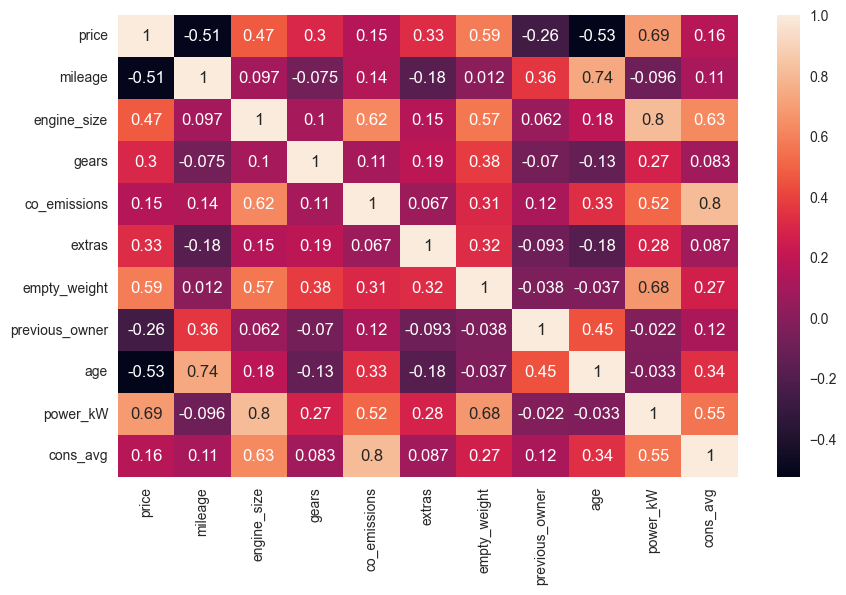

In [232]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot =True)

<a id="part_2"></a>

# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 2. Data Pre-Processing </p>



As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [233]:
X= df.drop(columns="price")
y= df.price

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OneHotEncoder

### Example

In [352]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [353]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [354]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [355]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [356]:
X_test

,col
7,good
8,bad
9,car


In [357]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,col_bad,col_bed,col_good,col_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0


In [358]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


,col_bad,col_bed,col_good,col_worst
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [359]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,good,6
6,good,7
7,bad,8
8,ugly,9
9,worst,10


In [360]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [361]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,good


In [362]:
X_test

,col
6,good
7,bad
8,ugly
9,worst


In [363]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [364]:
enc_2.fit_transform(X_train)

,col
0,1.0
1,0.0
2,2.0
3,2.0
4,1.0
5,2.0


In [365]:
enc_2.transform(X_test)

,col
6,2.0
7,1.0
8,-1.0
9,0.0


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [459]:
df.select_dtypes(include=object).head()

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


### Column Transformer with OrdinalEncoder 

In [235]:
ordinal_columns = ['type','warranty','gearbox','seller','full_service_history','upholstery',
                  'energy_efficiency_class','comfort_&_convenience_Package',
                  'entertainment_&_media_Package','safety_&_security_Package']

In [236]:
for col in df[ordinal_columns]:
    print(f"{col:<30}:", df[col].unique())

type                          : ['Used' 'Pre-registered' 'Demonstration' "Employee's car"]
warranty                      : ['Yes' 'No']
gearbox                       : ['Manual' 'Automatic' 'Semi-automatic']
seller                        : ['Dealer' 'Private seller']
full_service_history          : ['No' 'Yes']
upholstery                    : ['Part/Full Leather' 'Cloth']
energy_efficiency_class       : ['unefficient' 'efficient']
comfort_&_convenience_Package : ['Standard' 'Premium' 'Premium Plus']
entertainment_&_media_Package : ['Plus' 'Standard']
safety_&_security_Package     : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [237]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
# Define the categorical columns for OneHotEncoding and OrdinalEncoding
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history', 'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

# Define the categories for the OrdinalEncoder
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# Split the data into training and test sets
X = df.drop(columns=['price'])  # Features
y = df['price']                 # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the column transformer
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(categories=[cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) 

# Set the output to pandas DataFrame
column_trans = column_trans.set_output(transform="pandas")
column_trans.fit_transform(X_train)
# Fit the transformer on X_train and transform both X_train and X_test
X_train_transformed = column_trans.fit_transform(X_train)
X_test_transformed = column_trans.transform(X_test)

X_train_transformed.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,98027.000,1560.000,6.000,89.000,1,1472.000,3.000,7.000,84.000,3.900
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,17195.000,1995.000,8.000,136.000,7,1826.000,1.000,1.000,140.000,5.200
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,225000.000,1998.000,6.000,178.000,6,1395.000,1.000,13.000,132.000,7.600
1430,0.000,0.000,0.00

In [238]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show();

## Scaling

In [239]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler on X_train_transformed and transform both X_train_transformed and X_test_transformed
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

#if there is dummies features use the minmaxscaler

In [240]:
X_train_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.163,0.268,0.714,0.223,0.000,0.371,0.250,0.350,0.109,0.213
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.500,1.000,0.500,0.029,0.343,1.000,0.341,0.316,0.545,0.000,0.050,0.258,0.284
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.375,0.344,0.714,0.446,0.263,0.333,0.000,0.650,0.237,0.415
1430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

#### Encoding: Transform the categorical features using column_trans.
#### Scaling: Scale the numerical features using MinMaxScaler.
#### Training: Fit the LinearRegression model using the processed training data.

<a id="part_3"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 3. Implement Linear Regression </p>

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [241]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    model_name = model.__class__.__name__

    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
                                    "mae": mean_absolute_error(y_train, y_train_pred),
                                    "mse": mean_squared_error(y_train, y_train_pred),
                                    "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                    "mape": mean_absolute_percentage_error(y_train, y_train_pred)},

              model_name+"_test": {"R2" : r2_score(y_test, y_pred),
                                   "mae": mean_absolute_error(y_test, y_pred),
                                   "mse": mean_squared_error(y_test, y_pred),
                                   "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                                   "mape": mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)


def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [242]:
# Initialize and fit the LinearRegression model on the scaled training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)




LinearRegression()

In [243]:
# Evaluate the model using train_val function
lr = train_val(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(lr)

      LinearRegression_train  LinearRegression_test
R2                     0.831                  0.830
mae                 2856.348               2824.199
mse             27093642.822           24574431.490
rmse                5205.155               4957.260
mape                   0.202                  0.192


In [244]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

,LinearRegression_train,LinearRegression_test
R2,0.831,0.830
mae,2856.348,2824.199
mse,27093642.822,24574431.490
rmse,5205.155,4957.260
mape,0.202,0.192


In [247]:
y_pred = lr_model.predict(X_test_scaled)
y_train_pred = lr_model.predict(X_train_scaled)
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

# We obtain our score by giving the necessary parameters to the function.

test adj_R2 score  : 0.8251074626666212
train adj_R2 score : 0.8301923882701251


## Cross Validate

In [36]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)

# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

## Prediction Error

In [37]:
pd.DataFrame(scores, index = range(1,11))

# To make it easier to read, we turn the returned dictionary into a dataframe.

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.028683,0.004996,0.863274,0.827626,-2994.969780,-2842.164720,-2.303180e+07,-2.756260e+07,-4799.145824,-5250.009362,-0.217379,-0.200864
2,0.029994,0.004001,0.851085,0.829500,-2770.064560,-2880.110373,-1.993835e+07,-2.791861e+07,-4465.238377,-5283.806524,-0.200960,-0.204401
3,0.026513,0.004002,0.840653,0.830427,-2873.696772,-2868.180330,-2.313793e+07,-2.755470e+07,-4810.190337,-5249.257015,-0.215947,-0.201603
4,0.027003,0.003994,0.846066,0.829939,-2799.158997,-2861.717083,-2.219179e+07,-2.765287e+07,-4710.816484,-5258.599379,-0.200668,-0.202905
5,0.026001,0.005003,0.844546,0.830039,-2798.143544,-2860.665216,-2.286400e+07,-2.758242e+07,-4781.631889,-5251.897070,-0.197643,-0.201901
6,0.025518,0.003995,0.831218,0.831410,-2852.961538,-2856.731242,-2.940968e+07,-2.685029e+07,-5423.069166,-5181.726294,-0.207185,-0.202040
7,0.026996,0.004001,0.790785,0.836496,-3021.169643,-2828.893596,-3.830262e+07,-2.587965e+07,-6188.910792,-5087.204376,-0.209248,-0.200189
8,0.025998,0.004511,0.848303,0.829751,-2706.129210,-2877.726454,-2.110526e+07,-2.777198e+07,-4594.045889,-5269.912382,-0.197918,-0.202732
9,0.025997,0.003997,0.789786,0.837417,-3012.990378,-2818.126469,-4.362373e+07,-2.529052e+07,-6604.826476,-5028.968077,-0.198828,-0.200599
10,0.025999,0.003998,0.808835,0.833830,-2925.619931,-2841.032743,-3.131115e+07,-2.665792e+07,-5595.637127,-5163.131036,-0.187587,-0.202856


In [38]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

test_r2                                     8.314553e-01
train_r2                                    8.316436e-01
test_neg_mean_absolute_error               -2.875490e+03
train_neg_mean_absolute_error              -2.853535e+03
test_neg_mean_squared_error                -2.749163e+07
train_neg_mean_squared_error               -2.707216e+07
test_neg_root_mean_squared_error           -5.197351e+03
train_neg_root_mean_squared_error          -5.202451e+03
test_neg_mean_absolute_percentage_error    -2.033362e-01
train_neg_mean_absolute_percentage_error   -2.020090e-01
dtype: float64

In [133]:
train_val(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Comparing train and test scores to diagnose overfitting/underfitting is not too bad of a method, but if we strictly take the test set as a reference to tune our model,
# we will end up overestimating the model performance in the most optimistic/ambitious way. Trying to diagnose overfitting/underfitting from CV results
# is the best way to go about it.

# Also, CV tells us much more about the consistency and reliability of the model as well as different parts of the dataset.

,LinearRegression_train,LinearRegression_test
R2,8.602916e-01,8.599753e-01
mae,2.833619e+03,2.736688e+03
mse,1.642573e+07,1.522679e+07
rmse,4.052866e+03,3.902152e+03
mape,1.484299e-01,1.473963e-01


In [40]:
lr_model.coef_

# We will assign the coefficients of each model to their own variables to compare
# how regularisation affects the coefficients later on.

array([-5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -5.11344709e+15, -5.11344709e+15, -5.11344709e+15,
       -5.11344709e+15, -

In [41]:
lr_model_df = pd.DataFrame(lr_model.coef_, columns = ["lr_model_coef"])
lr_model_df

,lr_model_coef
0,-5.113447e+15
1,-5.113447e+15
2,-5.113447e+15
3,-5.113447e+15
4,-5.113447e+15
...,...
105,3.211000e+03
106,-7.670625e+02
107,-1.633400e+04
108,3.313200e+04


## Residual Plot

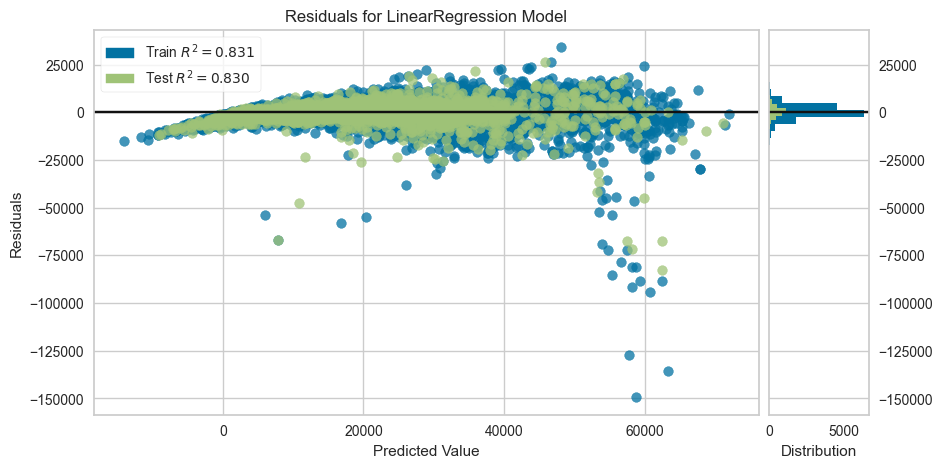

In [250]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

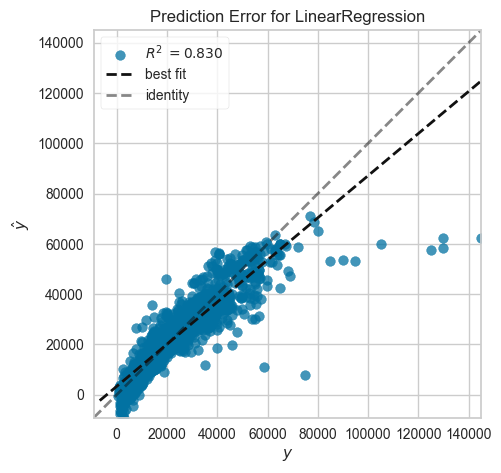

In [248]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

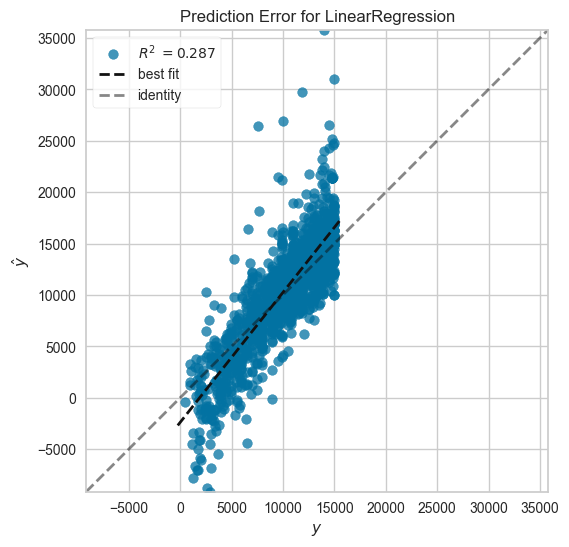

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
# Subset the test set where price is less than $20,000
subset_mask = y_test < 15000
X_test_subset = X_test_scaled[subset_mask]
y_test_subset = y_test[subset_mask]

# Initialize the LinearRegression model
model = LinearRegression()

# Initialize the PredictionError visualizer
visualizer = PredictionError(model, size=(900, 600))

# Fit the visualizer on the training data
visualizer.fit(X_train_scaled, y_train)

# Score the visualizer on the subset of test data (where price < $20,000)
visualizer.score(X_test_subset, y_test_subset)

# Show the visualizer
visualizer.show()

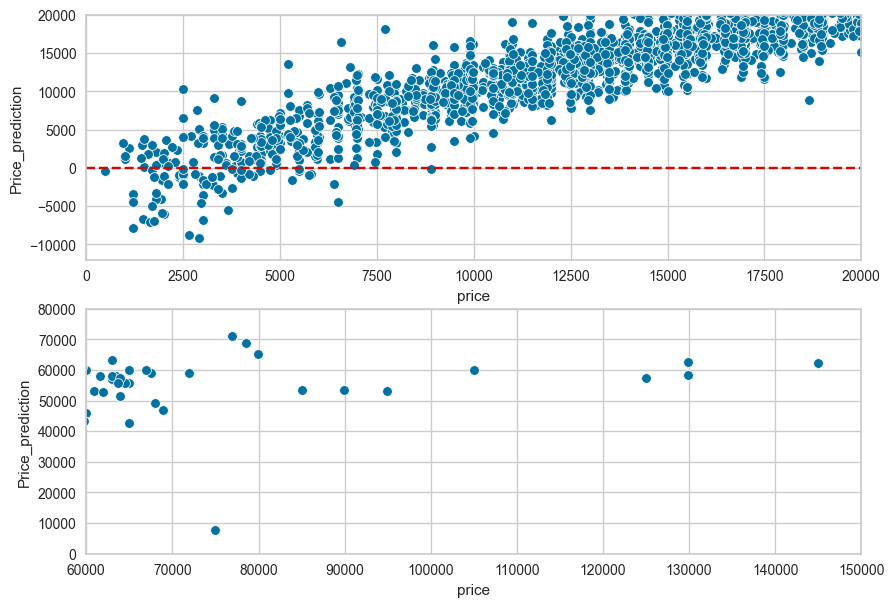

In [249]:
y_pred=lr_model.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("Price_prediction")
plt.xlim([0,20000])
plt.ylim([-12000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.ylabel("Price_prediction")
plt.xlim([60000, 150000])
plt.ylim([0,80000])
plt.show();

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.
# The question that immediately comes to our mind should be: What is the distribution of car prices below 7500 EURO
# and above 70 thousand EURO in the residual plot? We will look at the residual plot below and see
# if linear regression is a good choice for the determination of the car prices we mentioned.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [251]:
df = df[(df.price > 7500)&(df.price <70000)]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
5,Mercedes-Benz A 180,32900.000,Compact,Pre-registered,Yes,25.000,Manual,Benzine,Dealer,1332.000,6.000,126.000,Front,1,1350.000,No,Cloth,1.000,unefficient,1.000,100.000,0.000,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18191,Volvo S90,27190.000,Sedan,Used,Yes,93757.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,Front,1,1683.000,No,Part/Full Leather,1.000,efficient,4.000,140.000,4.400,Standard,Standard,Safety Premium Plus Package
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,9,1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,1,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package


In [252]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [254]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [256]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [258]:
ls = train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)
ls

,LinearRegression_train,LinearRegression_test
R2,0.880,0.876
mae,2581.955,2495.714
mse,14145145.863,13441877.947
rmse,3761.003,3666.317
mape,0.131,0.131


In [51]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     8.770410e-01
train_r2                                    8.797659e-01
test_neg_mean_absolute_error               -2.606627e+03
train_neg_mean_absolute_error              -2.583499e+03
test_neg_mean_squared_error                -1.444847e+07
train_neg_mean_squared_error               -1.413599e+07
test_neg_root_mean_squared_error           -3.796478e+03
train_neg_root_mean_squared_error          -3.759731e+03
test_neg_mean_absolute_percentage_error    -1.326039e-01
train_neg_mean_absolute_percentage_error   -1.314848e-01
dtype: float64

In [259]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)


### Prediction Error without Outliers

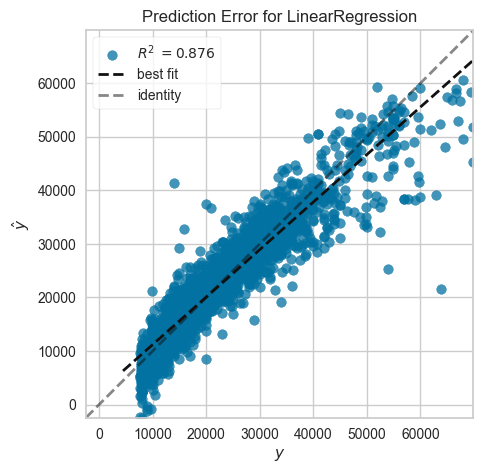

In [260]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

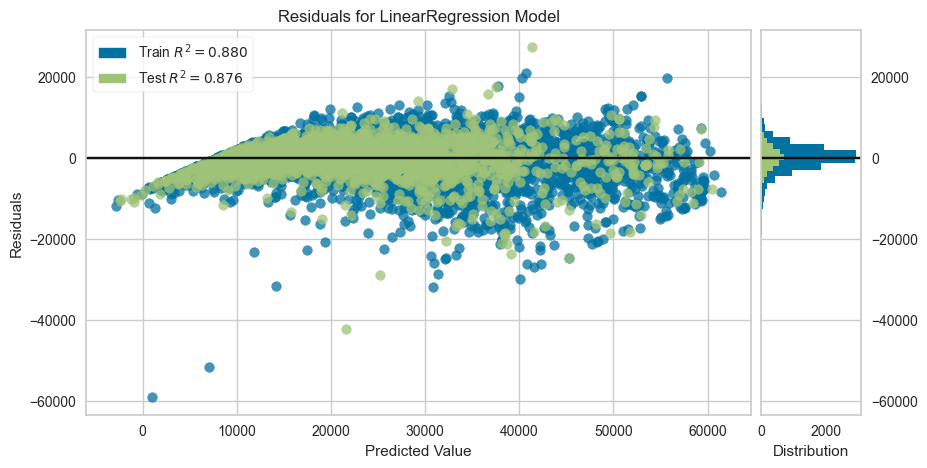

In [261]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 


In [262]:
pd.DataFrame(lm2.coef_, 
             index = X_train_scaled.columns, 
             columns=["Coef"])
# The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur when new dummies are generated from a feature

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

,Coef
make_model_Dacia Duster,4837484052341115.000
make_model_Dacia Logan,4837484052339442.000
make_model_Dacia Sandero,4837484052337862.000
make_model_Fiat 500,4837484052339816.000
make_model_Fiat 500C,4837484052342066.000
...,...
empty_weight,4279.000
previous_owner,-400.500
age,-19987.000
power_kW,33007.250


## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [265]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [268]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [270]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

#What happens can be described as follows:

#The data are split into TRAINING data and TEST data according to ratio of train_test_split

#Fit process:

#ridge_pipe.fit(X_train, y_train) Here, what does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the train data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the train data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed. It is left as it is.
#  (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric train data obtained after the transformation, according to the min, max
#   information of the train data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#   0 and 1.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled train data (X_train) is given to the Ridge model together with y_train, and the training is
#   completed.

#ridge_pipe.fit(X_train, y_train) --> columns_trans.fit_transform(X_train)
#                                 --> MinMaxScaler().fit_transform(X_train_trans)
#                                 --> Ridge.fit(X_train_trans_scaled, y_train)

#Predict process:

#ridge_pipe.predict(X_test) What does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the test data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the test data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed in the test data.
#   It is left as it is. (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric test data obtained after the transformation, according to the min, max 
#   information of the train data.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled test data is predicted by the Ridge model according to the information of the train data.

#ridge_pipe.predict(X_test)  --> columns_trans.transform(X_test)
#                            --> MinMaxScaler().transform(X_test_trans)
#                            --> Ridge.predict(X_test_trans_scaled)

#Pipeline automates our processes as described here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

<a id="part_4"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 4. Implement Ridge Regression </p>

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [91]:
from sklearn.linear_model import Ridge

In [271]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [273]:
rs =train_val(ridge_model, X_train, y_train, X_test, y_test)
rs

,Pipeline_train,Pipeline_test
R2,0.880,0.876
mae,2580.596,2494.098
mse,14151069.131,13451574.795
rmse,3761.791,3667.639
mape,0.131,0.130


In [285]:
pd.concat([ ls, rs], axis = 1)

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test
R2,0.880,0.876,0.880,0.876
mae,2581.955,2495.714,2580.596,2494.098
mse,14145145.863,13441877.947,14151069.131,13451574.795
rmse,3761.003,3666.317,3761.791,3667.639
mape,0.131,0.131,0.131,0.130


## Cross Validation

In [274]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [275]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.072,0.016,0.883,0.879,-2658.956,-2568.946,-14695117.185,-14110508.047,-3833.421,-3756.396,-0.130,-0.131
2,0.089,0.015,0.875,0.880,-2644.623,-2578.418,-14200648.755,-14172160.132,-3768.375,-3764.593,-0.136,-0.131
3,0.077,0.014,0.888,0.879,-2526.843,-2590.220,-13129046.287,-14277301.651,-3623.403,-3778.532,-0.130,-0.132
4,0.082,0.015,0.868,0.881,-2736.983,-2563.246,-17295599.965,-13839085.639,-4158.798,-3720.092,-0.134,-0.131
5,0.087,0.013,0.877,0.880,-2567.517,-2584.420,-13048896.184,-14285705.482,-3612.326,-3779.644,-0.132,-0.131
6,0.074,0.012,0.869,0.881,-2613.070,-2580.931,-14492974.304,-14126753.287,-3806.964,-3758.557,-0.137,-0.131
7,0.097,0.016,0.889,0.879,-2462.753,-2597.636,-12488050.674,-14346209.792,-3533.844,-3787.639,-0.126,-0.132
8,0.089,0.016,0.878,0.880,-2586.408,-2583.628,-13763560.525,-14209083.637,-3709.927,-3769.494,-0.131,-0.131
9,0.076,0.016,0.883,0.879,-2631.115,-2571.969,-14728233.287,-14104908.307,-3837.738,-3755.650,-0.131,-0.131
10,0.097,0.018,0.860,0.882,-2603.951,-2577.541,-16545801.980,-13899004.273,-4067.653,-3728.137,-0.134,-0.131


In [276]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2603.222
train_neg_mean_absolute_error                  -2579.696
test_neg_mean_squared_error                -14438792.915
train_neg_mean_squared_error               -14137072.025
test_neg_root_mean_squared_error               -3795.245
train_neg_root_mean_squared_error              -3759.873
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Ridge

In [146]:
# Choosing best alpha value with GridSearchCV for Ridge

In [277]:
from sklearn.model_selection import GridSearchCV

In [278]:
alpha_space = np.linspace(0.001, 100, 100)

In [279]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [280]:
pipe_model.get_params()  # to see the parameters of the model defined with pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'gearbox',
                                     'fuel_type', 'drivetrain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                "Employee's car",
                                                                'Demonstration',
                                                                'Pre-registered'],
                                                               ['No', 'Yes'],
                                                               ['Dealer',
                                  

In [281]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [282]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

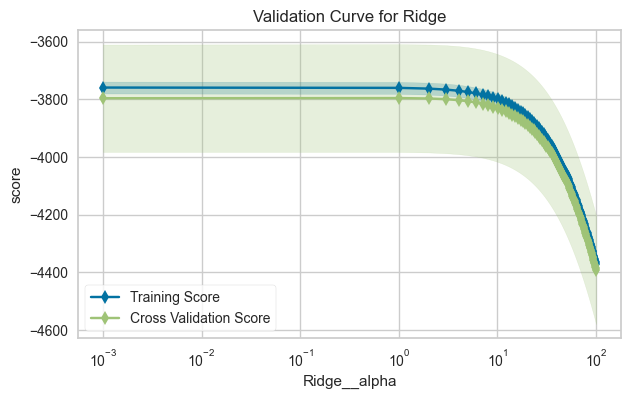

In [283]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Ridge__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [284]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.252
mean_train_score   -3759.895
Name: 1, dtype: object

In [286]:
grs = train_val(ridge_grid_model, X_train, y_train, X_test, y_test)
grs

,GridSearchCV_train,GridSearchCV_test
R2,0.880,0.876
mae,2580.585,2494.075
mse,14151207.110,13451629.912
rmse,3761.809,3667.646
mape,0.131,0.130


In [288]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [289]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ -1605.33987449,  -3179.763538  ,  -4690.76770258,  -2762.96734981,
         -609.18182036,   -615.72144197,  -3225.278956  ,  -3672.17220693,
        -3122.28831112,  -1390.82522765,   -254.76231792,   -640.03120281,
        -4671.66587996,   -541.79116613,   2383.74676001,  -3197.44377938,
        -2689.60709432,   4591.71435829,  -4136.71155589,  -7620.65258738,
        -1229.41401079,  -3758.53131206,  -2648.98603862,   1240.2991257 ,
          912.07677058,  -4080.97502772,  -3345.62928451,  -1256.82221008,
        -4279.97059019,   -172.95255635,  -2055.18646573,    397.02493184,
         2303.91029183,  -1470.66053681,  -2118.55452561,   3284.21532102,
         -459.59456619,   3391.13067218,   -218.02827754,   -919.15102248,
        -2422.20460288,   -198.09792147,   -673.82564567,   -574.94178568,
        -1018.79805281,   2172.97944443,  -2707.70432418,  -2420.16478762,
        -2931.06195008,   4254.60287522,   8235.5206978 ,    -79.54623714,
        -2025.9089232 ,  

In [287]:
pd.concat([ ls, rs, grs], axis = 1)

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test
R2,0.880,0.876,0.880,0.876,0.880,0.876
mae,2581.955,2495.714,2580.596,2494.098,2580.585,2494.075
mse,14145145.863,13441877.947,14151069.131,13451574.795,14151207.110,13451629.912
rmse,3761.003,3666.317,3761.791,3667.639,3761.809,3667.646
mape,0.131,0.131,0.131,0.130,0.131,0.130


<a id="part_5"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 5. Implement Lasso Regression </p>

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [290]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [291]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [305]:
lss = train_val(lasso_model, X_train, y_train, X_test, y_test)
lss

,Pipeline_train,Pipeline_test
R2,0.879,0.876
mae,2583.070,2496.918
mse,14182021.132,13512780.059
rmse,3765.902,3675.973
mape,0.131,0.130


In [293]:
pd.concat([ls, rs, grs, lss], axis = 1)

# We can clearly see, when we compare the scores, that lasso model is underfitting. Becuase we know that the model can actually do
# much better like in the case of ridge model.

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test
R2,0.880,0.876,0.880,0.876,0.880,0.876,0.879,0.876
mae,2581.955,2495.714,2580.596,2494.098,2580.585,2494.075,2583.070,2496.918
mse,14145145.863,13441877.947,14151069.131,13451574.795,14151207.110,13451629.912,14182021.132,13512780.059
rmse,3761.003,3666.317,3761.791,3667.639,3761.809,3667.646,3765.902,3675.973
mape,0.131,0.131,0.131,0.130,0.131,0.130,0.131,0.130


## Cross Validation

In [294]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [295]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.253,0.015,0.883,0.879,-2662.152,-2572.512,-14743090.435,-14138086.991,-3839.673,-3760.065,-0.130,-0.131
2,0.200,0.015,0.875,0.880,-2645.778,-2581.091,-14300854.606,-14198483.950,-3781.647,-3768.088,-0.136,-0.131
3,0.218,0.013,0.889,0.878,-2530.314,-2592.525,-13118351.376,-14305812.937,-3621.926,-3782.303,-0.130,-0.132
4,0.251,0.012,0.867,0.881,-2739.943,-2565.616,-17401330.390,-13860889.213,-4171.490,-3723.022,-0.134,-0.131
5,0.236,0.014,0.876,0.880,-2572.302,-2587.331,-13071500.017,-14315365.911,-3615.453,-3783.565,-0.132,-0.131
6,0.224,0.016,0.868,0.880,-2617.121,-2582.595,-14499238.305,-14154737.711,-3807.787,-3762.278,-0.137,-0.131
7,0.198,0.017,0.889,0.878,-2461.178,-2601.081,-12470144.138,-14375688.949,-3531.309,-3791.529,-0.126,-0.132
8,0.223,0.017,0.878,0.879,-2587.941,-2586.128,-13795737.043,-14239532.165,-3714.261,-3773.530,-0.131,-0.131
9,0.322,0.016,0.884,0.879,-2629.926,-2574.210,-14670155.955,-14133820.029,-3830.164,-3759.497,-0.131,-0.131
10,0.310,0.019,0.861,0.881,-2605.049,-2579.821,-16484017.817,-13929427.874,-4060.051,-3732.215,-0.134,-0.131


In [296]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2605.170
train_neg_mean_absolute_error                  -2582.291
test_neg_mean_squared_error                -14455442.008
train_neg_mean_squared_error               -14165184.573
test_neg_root_mean_squared_error               -3797.376
train_neg_root_mean_squared_error              -3763.609
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Lasso

In [346]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [347]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['type'])],
                                                          verbose_featu...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [348]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

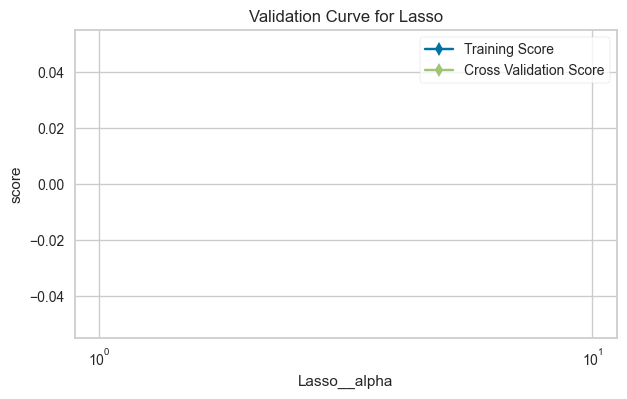

In [349]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Lasso__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [350]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3992.600
mean_train_score   -3970.176
Name: 0, dtype: object

In [351]:
X_train_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
7674,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.500,0.087,0.341,0.857,0.526,0.160,0.472,0.000,0.150,0.452,0.355
13227,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.500,1.000,0.500,0.179,0.251,0.571,0.327,0.240,0.277,0.000,0.200,0.061,0.224
8532,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.095,0.172,0.857,0.391,0.000,0.334,0.000,0.150,0.112,0.257
4458,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [352]:
X_test_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_No,warranty_Yes,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,full_service_history_No,full_service_history_Yes,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
5621,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.500,0.000,0.500,0.097,0.151,0.571,0.275,0.160,0.211,0.125,0.200,0.053,0.208
14584,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.500,1.000,0.500,0.000,0.257,0.714,0.364,0.240,0.595,0.000,0.050,0.178,0.301
8666,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.500,1.000,0.500,0.089,0.258,0.857,0.388,0.160,0.353,0.000,0.150,0.178,0.306
15746,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [353]:
lgs = train_val(lasso_grid_model, X_train, y_train, X_test, y_test)
lgs

,GridSearchCV_train,GridSearchCV_test
R2,0.866,0.860
mae,2765.883,2680.107
mse,15773600.186,15221429.641
rmse,3971.599,3901.465
mape,0.140,0.140


In [354]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [355]:
pd.concat([ls, rs, grs, lss,lgs], axis = 1)

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test
R2,0.880,0.876,0.880,0.876,0.880,0.876,0.879,0.876,0.866,0.860
mae,2581.955,2495.714,2580.596,2494.098,2580.585,2494.075,2583.070,2496.918,2765.883,2680.107
mse,14145145.863,13441877.947,14151069.131,13451574.795,14151207.110,13451629.912,14182021.132,13512780.059,15773600.186,15221429.641
rmse,3761.003,3666.317,3761.791,3667.639,3761.809,3667.646,3765.902,3675.973,3971.599,3901.465
mape,0.131,0.131,0.131,0.130,0.131,0.130,0.131,0.130,0.140,0.140


<a id="part_6"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 6. Implement Elastic-Net </p>

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [313]:
from sklearn.linear_model import ElasticNet

# ElasticNet is a combination of Ridge and Lasso algorithms. It combines them both under the same model.

In [358]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [359]:
es = train_val(elastic_model, X_train, y_train, X_test, y_test)
es

# The worst results we got so far.

,Pipeline_train,Pipeline_test
R2,0.125,0.126
mae,7629.155,7498.253
mse,102908268.697,95037795.843
rmse,10144.371,9748.733
mape,0.415,0.421


In [360]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.864
train_r2                                           0.866
test_neg_mean_absolute_error                   -2783.879
train_neg_mean_absolute_error                  -2764.986
test_neg_mean_squared_error                -15980577.740
train_neg_mean_squared_error               -15762787.100
test_neg_root_mean_squared_error               -3992.600
train_neg_root_mean_squared_error              -3970.176
test_neg_mean_absolute_percentage_error           -0.141
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64

In [361]:
pd.concat([ls, rs, grs, lss,lgs, es], axis = 1)

# comparing to the results of other models, we can clearly see that we're dealing with an underfitting situation here.

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test
R2,0.880,0.876,0.880,0.876,0.880,0.876,0.879,0.876,0.866,0.860,0.125,0.126
mae,2581.955,2495.714,2580.596,2494.098,2580.585,2494.075,2583.070,2496.918,2765.883,2680.107,7629.155,7498.253
mse,14145145.863,13441877.947,14151069.131,13451574.795,14151207.110,13451629.912,14182021.132,13512780.059,15773600.186,15221429.641,102908268.697,95037795.843
rmse,3761.003,3666.317,3761.791,3667.639,3761.809,3667.646,3765.902,3675.973,3971.599,3901.465,10144.371,9748.733
mape,0.131,0.131,0.131,0.130,0.131,0.130,0.131,0.130,0.140,0.140,0.415,0.421


## Cross Validation

In [362]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [363]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.864
train_r2                                           0.866
test_neg_mean_absolute_error                   -2783.879
train_neg_mean_absolute_error                  -2764.986
test_neg_mean_squared_error                -15980577.740
train_neg_mean_squared_error               -15762787.100
test_neg_root_mean_squared_error               -3992.600
train_neg_root_mean_squared_error              -3970.176
test_neg_mean_absolute_percentage_error           -0.141
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [364]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['type'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [365]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [366]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3992.442
mean_train_score   -3970.288
Name: 3, dtype: object

In [367]:
egs = train_val(elastic_grid_model, X_train, y_train, X_test, y_test)
egs
# GridSearch scores are aligned with test scores.

,GridSearchCV_train,GridSearchCV_test
R2,0.866,0.860
mae,2763.980,2677.928
mse,15774484.705,15213308.463
rmse,3971.711,3900.424
mape,0.140,0.140


In [368]:
pd.concat([ls, rs, grs, lss,lgs, es,egs], axis = 1)

,LinearRegression_train,LinearRegression_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test,Pipeline_train,Pipeline_test,GridSearchCV_train,GridSearchCV_test
R2,0.880,0.876,0.880,0.876,0.880,0.876,0.879,0.876,0.866,0.860,0.125,0.126,0.866,0.860
mae,2581.955,2495.714,2580.596,2494.098,2580.585,2494.075,2583.070,2496.918,2765.883,2680.107,7629.155,7498.253,2763.980,2677.928
mse,14145145.863,13441877.947,14151069.131,13451574.795,14151207.110,13451629.912,14182021.132,13512780.059,15773600.186,15221429.641,102908268.697,95037795.843,15774484.705,15213308.463
rmse,3761.003,3666.317,3761.791,3667.639,3761.809,3667.646,3765.902,3675.973,3971.599,3901.465,10144.371,9748.733,3971.711,3900.424
mape,0.131,0.131,0.131,0.130,0.131,0.130,0.131,0.130,0.140,0.140,0.415,0.421,0.140,0.140


In [369]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [370]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [371]:
df_feat_imp

,Coef
age,-22301.521
mileage,-22297.051
make_model_Dacia Sandero,-6756.605
make_model_Toyota Aygo,-5762.584
make_model_Nissan Micra,-5757.053
make_model_Opel Corsa,-5473.744
make_model_Opel Adam,-5237.247
make_model_Fiat Tipo,-5069.167
make_model_Hyundai i20,-5054.980
make_model_Dacia Logan,-4990.780


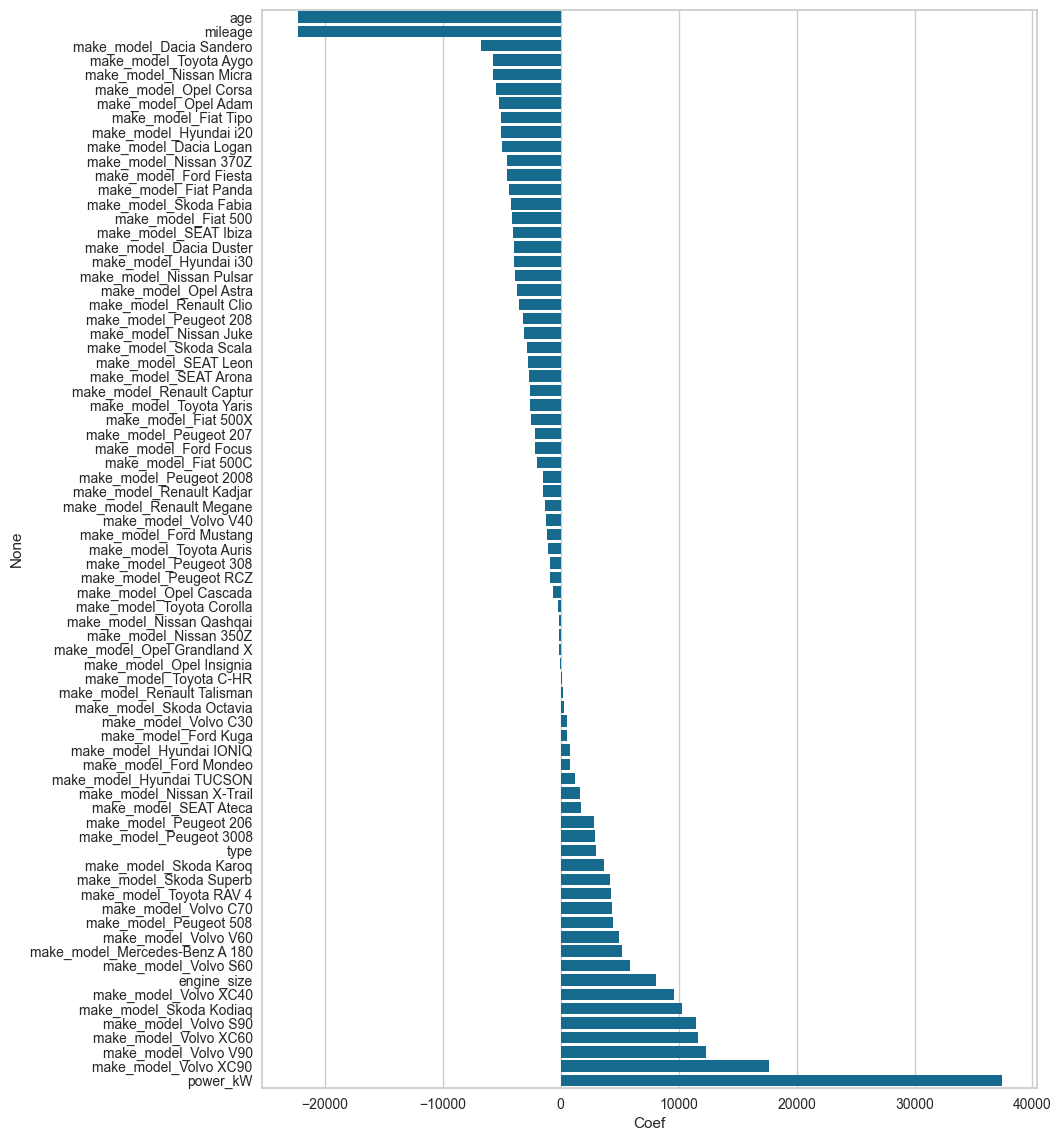

In [372]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [373]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=0.001)

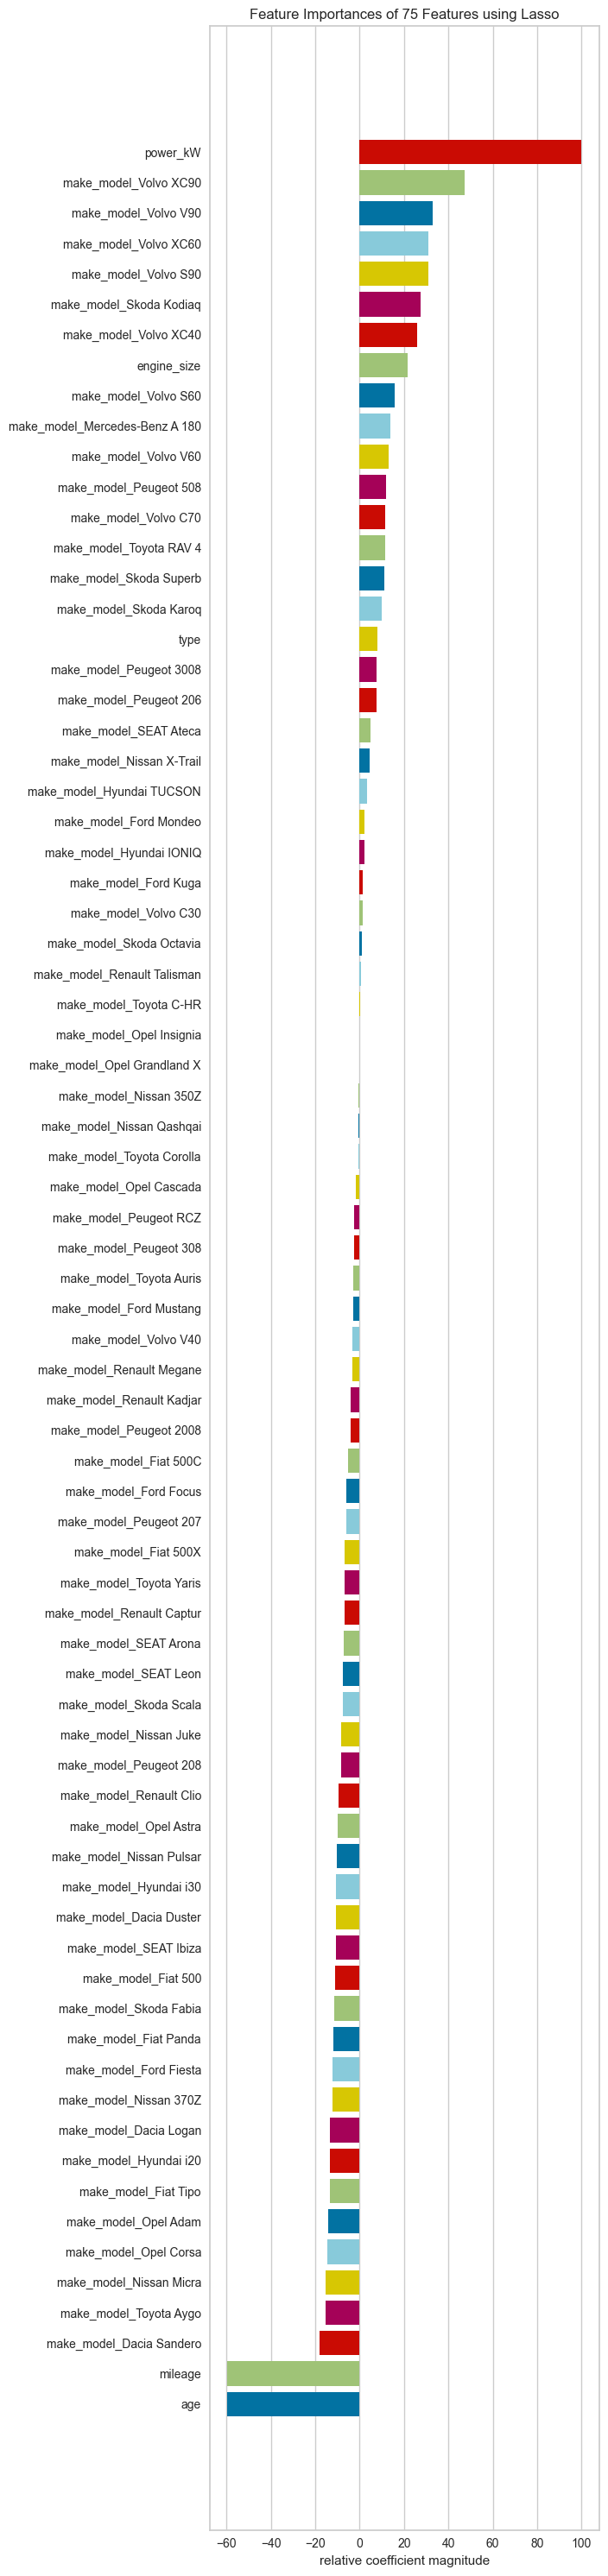

In [374]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [375]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the "type" feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation.

In [376]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered,32900.000
...,...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used,27190.000
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000


In [377]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [379]:
X_train.head()

,make_model,power_kW,mileage,age,engine_size,type
7674,SEAT Leon,213.000,35977.000,3.000,1984.000,Used
13227,Nissan Micra,66.000,74314.000,4.000,1461.000,Used
8532,Skoda Octavia,85.000,39563.000,3.000,999.000,Used
4458,Peugeot 508,147.000,80300.000,5.000,1997.000,Used
15437,Hyundai i30,100.000,24576.000,6.000,1591.000,Used


In [380]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [381]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,Pipeline_train,Pipeline_test
R2,0.866,0.860
mae,2765.883,2680.107
mse,15773600.186,15221429.641
rmse,3971.599,3901.465
mape,0.140,0.140


## Cross Validate

In [382]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

<a id="part_7"></a>
# <p style="background-color:#3455DB; font-family:newtimeroman;color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px;"> 7. Visually Compare Models Performance In a Graph </p>

## 7. Visually Compare Models Performance In a Graph

In [383]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

,Model,r2_score,mae,rmse,mape
0,linear_m,0.876,2495.714,3666.317,0.131
1,ridge_m,0.876,2494.075,3667.646,0.130
2,lasso_m,0.860,2680.107,3901.465,0.140
3,elastic_m,0.860,2677.928,3900.424,0.140
4,final_m,0.860,2680.107,3901.465,0.140


In [384]:
compare.sort_values(by="r2_score", ascending=False) #  ascending=False sorts in descending (high-->low) order.

,Model,r2_score,mae,rmse,mape
0,linear_m,0.876,2495.714,3666.317,0.131
1,ridge_m,0.876,2494.075,3667.646,0.130
3,elastic_m,0.860,2677.928,3900.424,0.140
2,lasso_m,0.860,2680.107,3901.465,0.140
4,final_m,0.860,2680.107,3901.465,0.140


In [385]:
compare.sort_values(by="mae", ascending=True) #  ascending=True sorts in ascending (low-->high) order.

,Model,r2_score,mae,rmse,mape
1,ridge_m,0.876,2494.075,3667.646,0.130
0,linear_m,0.876,2495.714,3666.317,0.131
3,elastic_m,0.860,2677.928,3900.424,0.140
2,lasso_m,0.860,2680.107,3901.465,0.140
4,final_m,0.860,2680.107,3901.465,0.140


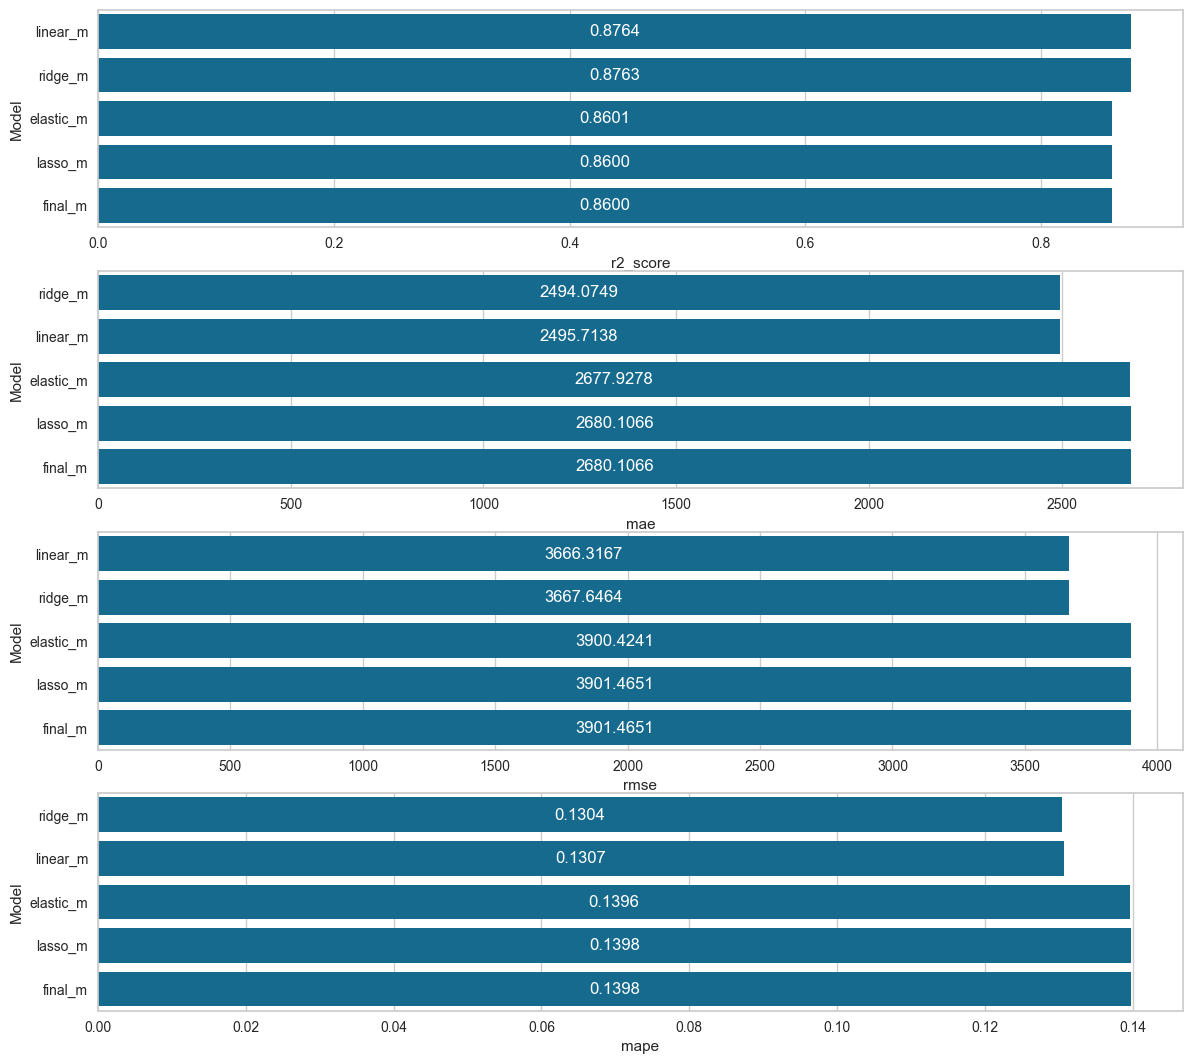

In [386]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [387]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [388]:
X.head()

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered


In [389]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 6 features, as our final model.
# In the lasso model with 6 features, we re-build the model with the hyperparameter, where we get the best score.

In [390]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do in order?
# 1. Since the first operation to be done in final_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in X data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in X data that will be transformed (cat_ordinal) 
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed. They are
#       left as they are.
# 2. Since the second operation to be done in final_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric X we obtained after the transformation according to the min and max
#       information of X data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#       as 0 and 1.
# 3. Since the third operation to be done in final_model is Lasso();
#    a. The transformed and scaled X is given to the Lasso model along with y and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [391]:
X

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered
...,...,...,...,...,...,...
18190,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18191,Volvo S90,140.000,93757.000,4.000,1969.000,Used
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used


In [392]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [393]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered


In [394]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85,30000,3,1461,Used


In [395]:
final_model.predict(new_obs)

array([27100.53480812])

In [396]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3,
    "color":"white"
}

new_obs = pd.DataFrame([my_dict])
new_obs

,type,power_kW,make_model,engine_size,mileage,age,color
0,Used,85,Mercedes-Benz A 180,1461,30000,3,white


In [397]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

array([27100.53480812])

In [398]:
# What does pipe_model.predict(new_obs) do in order?

# 1. Since the first operation to be done in pipe_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in new_obs data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in new_obs data that will be transformed (cat_ordinal)
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed in new_obs data.
#       They are left as they are.
# 2. Since the second operation to be done in pipe_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric new_obs we obtained after the transformation according to the min and max
#       information of X data.
# 3. Since the third operation to be done in pipe_model is Lasso();
#    a. The transformed and scaled new_obs data is predicted by the Lasso model according to the information of X.

___

<p style="text-align: center;"><img src="https://clarusway.com/wp-content/uploads/2022/07/clarusway-logo-classic.jpg" class="img-fluid" alt="CLRSWY" width="400" height="300"
></p>

___